In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from nPoisson import PoissonSolver

%matplotlib inline
%matplotlib notebook


from scipy.interpolate import Rbf

In [14]:
def interp_grid(x, y, dx, dy, X_range, Y_range,nX, nY):
#     Nx = 30
#     Ny = 30
    xx = np.linspace(0, X_range, nX)
    yy = np.linspace(0, Y_range, nY)
    XX, YY = np.array(np.meshgrid(xx, yy))

    XXX = XX.ravel()  # flatten
    YYY = YY.ravel()


    interp_x = Rbf(x, y, dx)
    interp_y = Rbf(x, y, dy)

    vx = interp_x(XXX, YYY)
    vy = interp_y(XXX, YYY)
    
    return XXX, YYY, vx, vy

from scipy.optimize import curve_fit

def linear_func(x, a, b):
    return a*x + b

def inv_linear_func(y, a, b):
    return (y - b)/a

In [15]:
from pynhhd.nHHD import nHHD

dx = 0.045/29
dy = 0.045/29
grid = (30, 30)

decomposition_obj = nHHD(grid=grid, spacings=(dy, dx))

PoissonSolver: 2 D grid = (30, 30) with spacings (0.0015517241379310344, 0.0015517241379310344)

Initializing Poisson solver, type = F
  - creating distance kernel: (59, 59) 0.0007758621 0.06363961  [[ elapsed time: 0.419 milli-sec. ]]
  - computing the Green's function: (59, 59) -1.1397938 -0.43839532  [[ elapsed time: 0.205 milli-sec. ]]
Poisson solver initialized  [[ elapsed time: 0.891 milli-sec. ]]


[119.63126719 290.3730474 ]


<IPython.core.display.Javascript object>


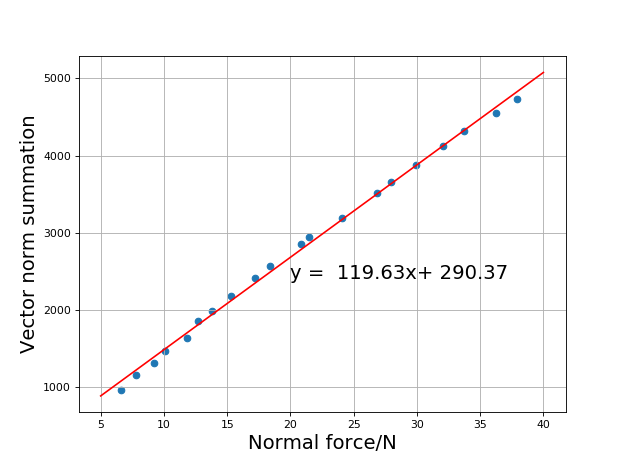

[116.54934953 323.16404992]


<IPython.core.display.Javascript object>


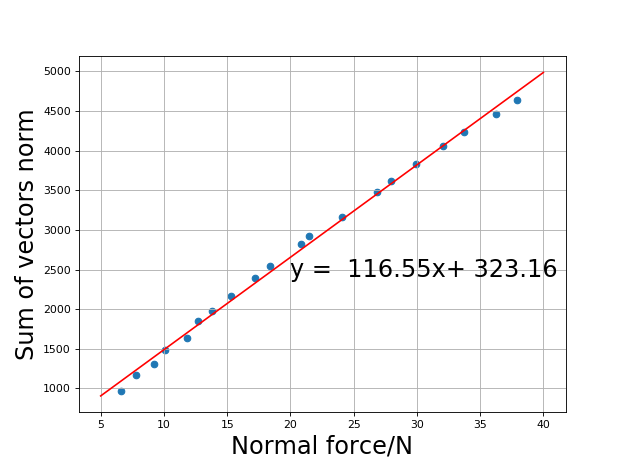

Text(0,0.5,'Sum of vectors norm')

In [24]:
# read in data from FT sensor
df_ft = pd.read_csv('../dataset_decomposition/normal_position_center/surface_wrench_normal1.csv')

wrench = df_ft.values

# print wrench

vector_mag = []
vector_mag_dec = []

for i in range(len(wrench)):
    path = '../dataset_decomposition/normal_position_center/csv/%04d.csv'%i
    df = pd.read_csv(path)

    # print node_pressure

    # plot nodes and corresponding displacement

    x  = df['x'].values
    y  = df['y'].values
    dx = df['xt'].values - x
    dy = df['yt'].values - y

    Nx, Ny = 30, 30

    XXX, YYY, vx, vy = interp_grid(x, y, dx, dy, X_range=560, Y_range=440,nX=30, nY=30)

    vxx = vx.reshape(Nx,Ny)
    vyy = vy.reshape(Nx,Ny)    

    vfield = np.stack((vxx, vyy), axis=2)

#     fig1, ax1 = plt.subplots(figsize=(10,8))
#     ax1.set_title('vector field -- pressure')

    M = np.hypot(vx, vy)
#     Q = ax1.quiver(XXX, YYY, vx,  vy, M,  units='width')

    radial_mag_sum = M.sum()
    vector_mag.append(radial_mag_sum)
    
    decomposition_obj.decompose(vfield, verbose=0)
    d = decomposition_obj.d
    r = decomposition_obj.r
    h = decomposition_obj.h
    
    M_dec = np.hypot(d[:,:,0], d[:,:,1])
    M_dec_sum = M_dec.sum()
    vector_mag_dec.append(M_dec_sum)
    
    
    

# print vector_mag


p_nor_individual, _ = curve_fit(linear_func, -wrench[:, 2], vector_mag)
print p_nor_individual

x_nor = np.linspace(5, 40, 100)
y_nor = linear_func(x_nor, p_nor_individual[0], p_nor_individual[1])


fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(-wrench[:, 2], vector_mag)
ax.plot(x_nor, y_nor, 'r')
plt.grid('True')

s = 'y = {:7.2f}x+{:7.2f}'.format(p_nor_individual[0], p_nor_individual[1])
plt.text(20, 2400, s , fontsize=18)
plt.xlabel('Normal force/N', fontsize=18)
plt.ylabel('Vector norm summation',fontsize=18)

#================================================
p_nor_individual_dec, _ = curve_fit(linear_func, -wrench[:, 2], vector_mag_dec)
print p_nor_individual_dec

x_nor = np.linspace(5, 40, 100)
y_nor = linear_func(x_nor, p_nor_individual_dec[0], p_nor_individual_dec[1])


fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(-wrench[:, 2], vector_mag_dec)
ax.plot(x_nor, y_nor, 'r')
plt.grid('True')

s = 'y = {:7.2f}x+{:7.2f}'.format(p_nor_individual_dec[0], p_nor_individual_dec[1])
plt.text(20, 2400, s , fontsize=22)
plt.xlabel('Normal force/N', fontsize=22)
plt.ylabel('Sum of vectors norm',fontsize=22)




[ 536.55184336 -170.0076445 ]


<IPython.core.display.Javascript object>


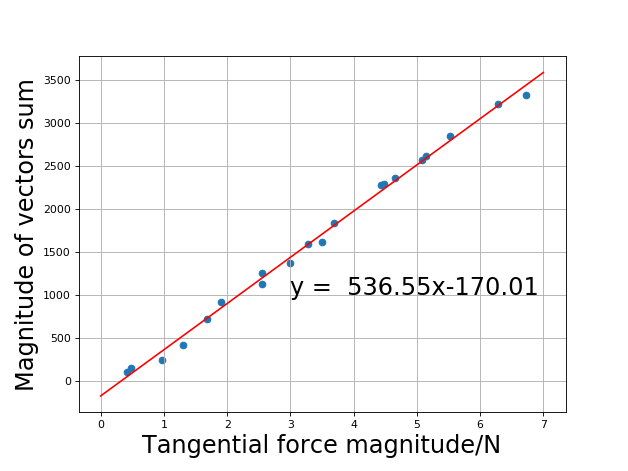

Text(0,0.5,'Magnitude of vectors sum')

In [25]:
# tangential
# read in data from FT sensor
df_ft = pd.read_csv('../dataset_decomposition/tangential/surface_wrench_normal1.csv')

wrench = df_ft.values
wrench_tan_mag = np.hypot(wrench[:, 0], wrench[:, 1])

# print wrench

vector_mag = []

for i in range(len(wrench)):
    path = '../dataset_decomposition/tangential/csv/%04d.csv'%i
    df = pd.read_csv(path)

    # print node_pressure

    # plot nodes and corresponding displacement

    x  = df['x'].values
    y  = df['y'].values
    dx = df['xt'].values - x
    dy = df['yt'].values - y

    Nx, Ny = 30, 30

    XXX, YYY, vx, vy = interp_grid(x, y, dx, dy, X_range=560, Y_range=440,nX=30, nY=30)

    vxx = vx.reshape(Nx,Ny)
    vyy = vy.reshape(Nx,Ny)    

    vfield = np.stack((vxx, vyy), axis=2)

#     fig1, ax1 = plt.subplots(figsize=(10,8))
#     ax1.set_title('vector field -- pressure')

    vxx_sum = vxx.sum()
    vyy_sum = vyy.sum()
#     Q = ax1.quiver(XXX, YYY, vx,  vy, M,  units='width')

    tan_vec_sum = np.hypot(vxx_sum, vyy_sum)
    vector_mag.append(tan_vec_sum)

# print vector_mag

p_tan_individual, _ = curve_fit(linear_func, wrench_tan_mag, vector_mag)
print p_tan_individual

x_tan = np.linspace(0, 7, 100)
y_tan = linear_func(x_tan, p_tan_individual[0], p_tan_individual[1])



fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(wrench_tan_mag, vector_mag)
ax.plot(x_tan, y_tan, 'r')
plt.grid('True')

s = 'y = {:7.2f}x{:7.2f}'.format(p_tan_individual[0], p_tan_individual[1])
plt.text(3, 1000, s , fontsize=22)
plt.xlabel('Tangential force magnitude/N', fontsize=22)
plt.ylabel('Magnitude of vectors sum',fontsize=22)

[8.92790587 4.39951884]


<IPython.core.display.Javascript object>


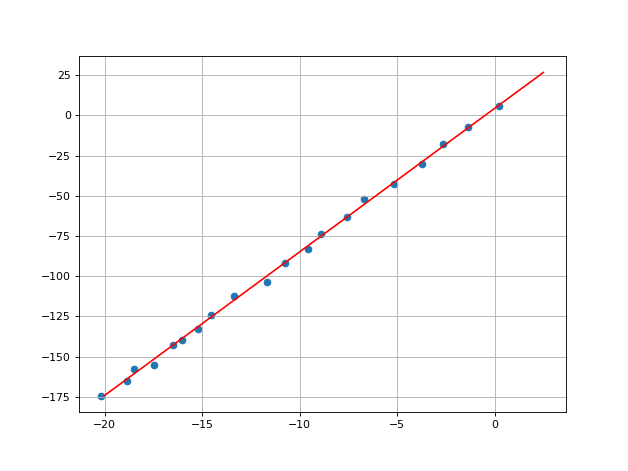

[8.83064352 2.90705354]


<IPython.core.display.Javascript object>


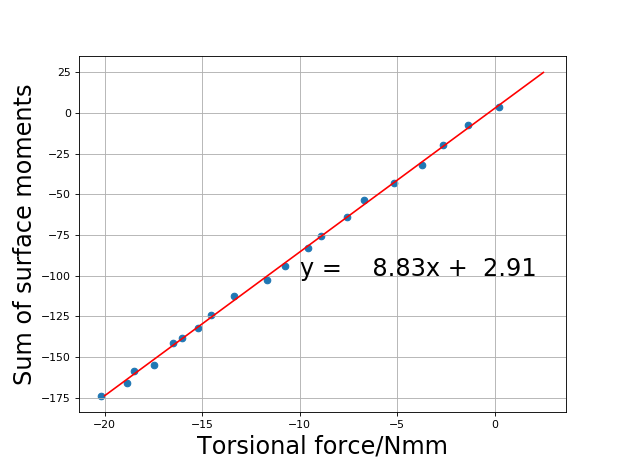

Text(0,0.5,'Sum of surface moments')

In [26]:
# torsional

# read in data from FT sensor
df_ft = pd.read_csv('../dataset_decomposition/torsional/surface_wrench_normal1.csv')

wrench = df_ft.values
wrench_tor_mag = wrench[:, 5]

# print wrench

vector_mag = []
vector_mag_dec = []

for i in range(len(wrench)):
    path = '../dataset_decomposition/torsional/csv/%04d.csv'%i
    df = pd.read_csv(path)

    # print node_pressure

    # plot nodes and corresponding displacement

    x  = df['x'].values
    y  = df['y'].values
    dx = df['xt'].values - x
    dy = df['yt'].values - y

    Nx, Ny = 30, 30

    XXX, YYY, vx, vy = interp_grid(x, y, dx, dy, X_range=560, Y_range=440,nX=30, nY=30)

    vxx = vx.reshape(Nx,Ny)
    vyy = vy.reshape(Nx,Ny)    

    vfield = np.stack((vxx, vyy), axis=2)

#     fig1, ax1 = plt.subplots(figsize=(10,8))
#     ax1.set_title('vector field -- pressure')
    
    center_loc = np.array([280, 220])
    diff_vec = np.stack((XXX, YYY), axis=1) - center_loc
#     print diff_vec.shape, vfield.shape
    
    torque = np.cross(diff_vec, vfield.reshape(Nx*Ny, -1))
#     print torque.shape
    torque = np.sum(torque, axis=0)/(Nx*Ny)
#     print torque/(Nx*Ny)

#     vxx_sum = vxx.sum()
#     vyy_sum = vyy.sum()
#     Q = ax1.quiver(XXX, YYY, vx,  vy, M,  units='width')

#     tan_vec_sum = np.hypot(vxx_sum, vyy_sum)
    vector_mag.append(torque)
    
    
    decomposition_obj.decompose(vfield, verbose=0)
    d = decomposition_obj.d
    r = decomposition_obj.r
    h = decomposition_obj.h
    
    center_loc = np.array([280, 220])
#     np.argmax(decomposition_obj.nRu)
#     print center_loc
    diff_vec = np.stack((XXX, YYY), axis=1) - center_loc
#     print diff_vec.shape, vfield.shape
    
    torque = np.cross(diff_vec, r.reshape(Nx*Ny, -1))
#     print torque.shape
    torque = np.sum(torque, axis=0)/(Nx*Ny)
    
    vector_mag_dec.append(torque)

# print vector_mag
wrench_tor_mag = wrench_tor_mag*1000
p_tor_individual, _ = curve_fit(linear_func, wrench_tor_mag, vector_mag)
print p_tor_individual

x_tor = np.linspace(-0.02*1000, 0.0025*1000, 100)
y_tor = linear_func(x_tor, p_tor_individual[0], p_tor_individual[1])

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(wrench_tor_mag, vector_mag)
ax.plot(x_tor, y_tor, 'r')
plt.grid('True')

#===========================================
wrench_tor_mag = wrench_tor_mag
p_tor_individual_dec, _ = curve_fit(linear_func, wrench_tor_mag, vector_mag_dec)
print p_tor_individual_dec

x_tor = np.linspace(-0.02*1000, 0.0025*1000, 100)
y_tor = linear_func(x_tor, p_tor_individual_dec[0], p_tor_individual_dec[1])

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(wrench_tor_mag, vector_mag_dec)
ax.plot(x_tor, y_tor, 'r')
plt.grid('True')

s = 'y = {:7.2f}x + {:5.2f}'.format(p_tor_individual_dec[0], p_tor_individual_dec[1])
plt.text(-10, -100, s , fontsize=22)
plt.xlabel('Torsional force/Nmm', fontsize=22)
plt.ylabel('Sum of surface moments',fontsize=22)

[127.28719444 612.42553505]
4.2366303220393835 2.2095934543417073


<IPython.core.display.Javascript object>


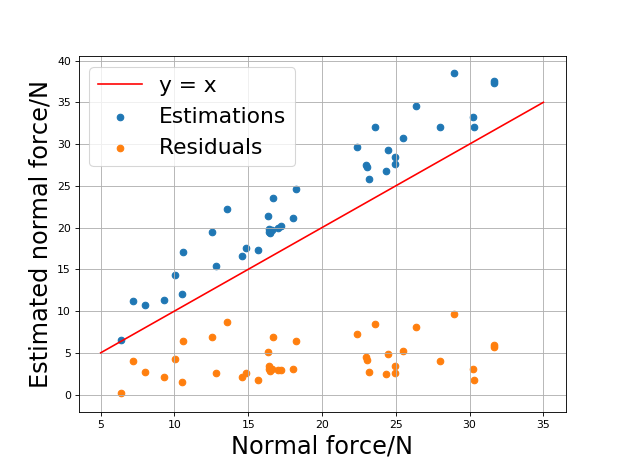

<IPython.core.display.Javascript object>


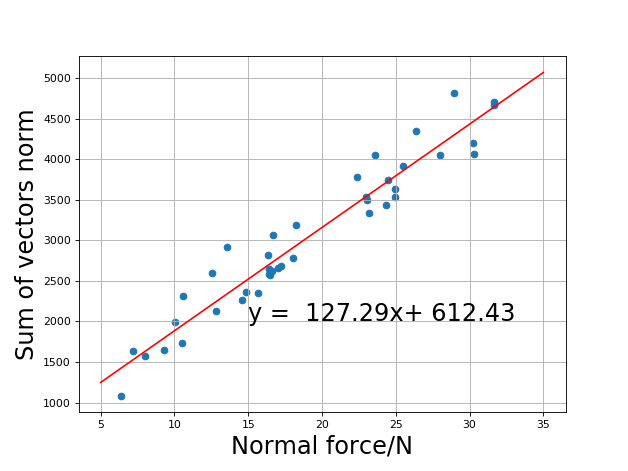

[500.79011863  -9.77074316]
0.013276589741696649 0.17043533231303243


<IPython.core.display.Javascript object>


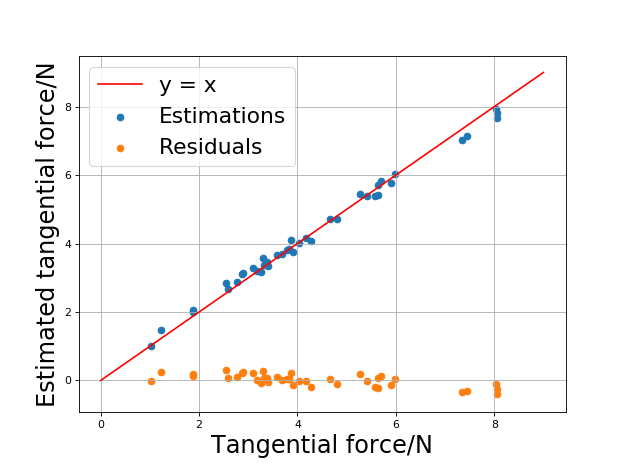

<IPython.core.display.Javascript object>


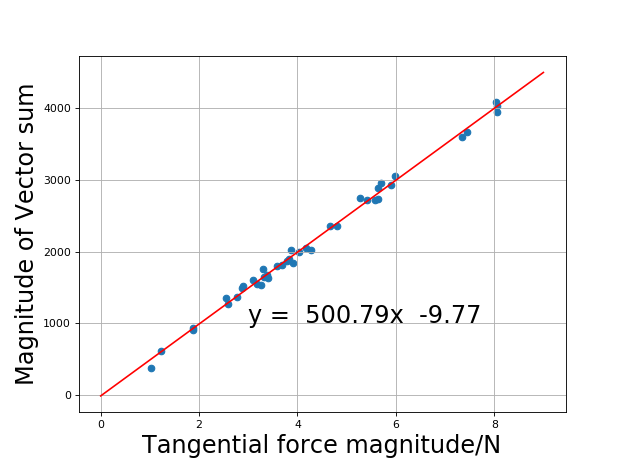

[8.70980919 1.72091937] [[ 0.02099316 -0.05018122]
 [-0.05018122  3.32653706]]
-0.3584188091702579 1.272740945884189


<IPython.core.display.Javascript object>


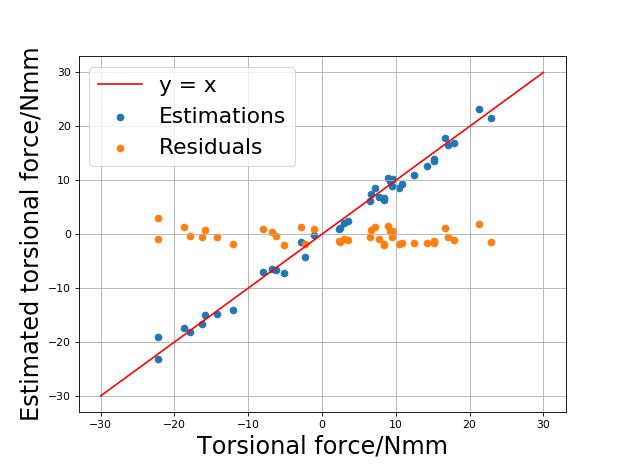

<IPython.core.display.Javascript object>


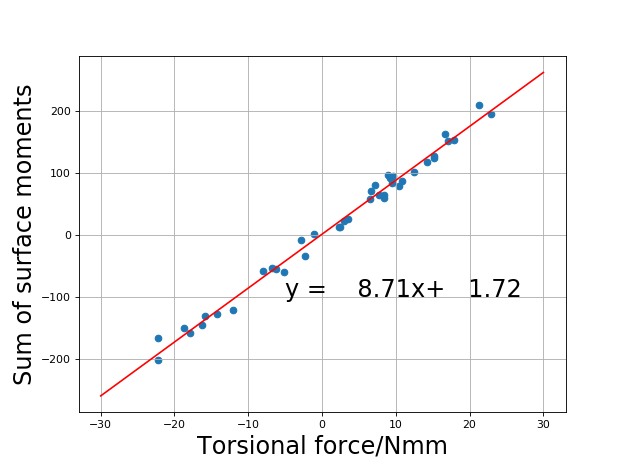

Text(0,0.5,'Sum of surface moments')

In [27]:
%matplotlib notebook

# combined vector field
# read in data from FT sensor
df_ft = pd.read_csv('../dataset_decomposition/combined1/surface_wrench_normal1.csv')

wrench = df_ft.values
wrench_tan_mag = np.hypot(wrench[:, 0], wrench[:, 1])
wrench_normal = -wrench[:, 2]
wrench_torque = wrench[:, 5]

# print wrench

vector_tan = []
vector_nor = []
vector_tor = []
vector_tor1 = []

for i in range(len(wrench)):
    path = '../dataset_decomposition/combined1/csv/%04d.csv'%i
    df = pd.read_csv(path)

    # print node_pressure

    # plot nodes and corresponding displacement

    x  = df['x'].values
    y  = df['y'].values
    dx = df['xt'].values - x
    dy = df['yt'].values - y

    Nx, Ny = 30, 30

    XXX, YYY, vx, vy = interp_grid(x, y, dx, dy, X_range=560, Y_range=440,nX=30, nY=30)

    vxx = vx.reshape(Nx,Ny)
    vyy = vy.reshape(Nx,Ny)    

    

    #     fig1, ax1 = plt.subplots(figsize=(10,8))
    #     ax1.set_title('vector field -- pressure')
    


    vxx_sum = vxx.sum()
    vyy_sum = vyy.sum()
#     Q = plt.quiver(XXX, YYY, vx,  vy, M,  units='width')

    tan_vec_sum = np.hypot(vxx_sum, vyy_sum)
    vector_tan.append(tan_vec_sum)
    
    # subtract tangential components
    vfield = np.stack((vxx, vyy), axis=2)
#     vfield = np.stack((vxx - vxx_sum/(Nx*Ny), vyy - vyy_sum/(Nx*Ny)), axis=2)
    
    decomposition_obj.decompose(vfield, verbose=0)
    d = decomposition_obj.d
    h = decomposition_obj.h
    r = decomposition_obj.r
    
    # calculate normal force from divergence field
#     print d.shape
    d_ = d.reshape(Nx*Ny, 2)
    
    M = np.hypot(d_[:, 0], d_[:, 1])
#     Q = ax1.quiver(XXX, YYY, vx,  vy, M,  units='width')

    radial_mag_sum = M.sum()
    vector_nor.append(radial_mag_sum)
    
    # calculate surface torque
    
    center_loc = np.array([280, 220])
    diff_vec = np.stack((XXX, YYY), axis=1) - center_loc
    #     print diff_vec.shape, vfield.shape
    
    torque = np.cross(diff_vec, r.reshape(Nx*Ny, -1))
    torque1 = np.cross(diff_vec, vfield.reshape(Nx*Ny, -1))
    #     print torque.shape
    torque = np.sum(torque, axis=0)/(Nx*Ny)
    torque1 = np.sum(torque1, axis=0)/(Nx*Ny)
    
    vector_tor.append(torque)
    vector_tor1.append(torque1)
    





# ===========================================================================
p_nor, _ = curve_fit(linear_func, wrench_normal, vector_nor)
print p_nor
x_nor = np.linspace(5, 35, 100)
y_nor = linear_func(x_nor, p_nor[0], p_nor[1])
x_est = inv_linear_func(vector_nor, p_nor_individual_dec[0], p_nor_individual_dec[1])
x_err = x_est - wrench_normal

print np.mean(x_err), np.std(x_err)

fig1, ax1 = plt.subplots(figsize=(8,6))
# ax1.scatter(wrench_normal, vector_nor)
# ax1.plot(x_nor, y_nor, 'r')

ax1.scatter(wrench_normal, x_est, label='Estimations')
ax1.scatter(wrench_normal, x_err, label='Residuals')

ax1.plot(x_nor, x_nor, 'r', label='y = x')
ax1.legend(prop={'size': 20})
plt.grid('True')

plt.xlabel('Normal force/N', fontsize=22)
plt.ylabel('Estimated normal force/N',fontsize=22)


#------------------------------------------------------
fig11, ax11 = plt.subplots(figsize=(8,6))
ax11.scatter(wrench_normal, vector_nor)
ax11.plot(x_nor, y_nor, 'r')
plt.grid('True')
s = 'y = {:7.2f}x+{:7.2f}'.format(p_nor[0], p_nor[1])
plt.text(15, 2000, s , fontsize=22)
plt.xlabel('Normal force/N', fontsize=22)
plt.ylabel('Sum of vectors norm',fontsize=22)
# ==================================================================
# data_tan = np.stack((wrench_tan_mag, vector_tan), axis=1)
p_tan, _ = curve_fit(linear_func, wrench_tan_mag, vector_tan)
print p_tan
x_tan = np.linspace(0, 9, 100)
y_tan = linear_func(x_tan, p_tan[0], p_tan[1])
# y_tan = linear_func(wrench_tan_mag, p_tan_individual[0], p_tan_individual[1])
x_est = inv_linear_func(vector_tan, p_tan_individual[0], p_tan_individual[1])
x_err = x_est - wrench_tan_mag

print np.mean(x_err), np.std(x_err)

fig, ax = plt.subplots(figsize=(8,6))
# ax.scatter(wrench_tan_mag, vector_tan)
# ax.scatter(wrench_tan_mag, y_tan, c='r')

ax.scatter(wrench_tan_mag, x_est, label='Estimations')
ax.scatter(wrench_tan_mag, x_err, label='Residuals')

plt.grid('True')

## plot y = x
ax.plot(x_tan, x_tan, 'r', label='y = x')
ax.legend(prop={'size': 20})
# s = 'y = {:5.2f}x + {:5.2f}'.format(p_tor_individual_dec[0], p_tor_individual_dec[1])
# plt.text(-10, -100, s , fontsize=18)
plt.xlabel('Tangential force/N', fontsize=22)
plt.ylabel('Estimated tangential force/N',fontsize=22)
# -------------------------------
fig01, ax01 = plt.subplots(figsize=(8,6))
ax01.scatter(wrench_tan_mag, vector_tan)
ax01.plot(x_tan, y_tan, 'r')
plt.grid('True')
s = 'y = {:7.2f}x{:7.2f}'.format(p_tan[0], p_tan[1])
plt.text(3,1000, s , fontsize=22)
plt.xlabel('Tangential force magnitude/N', fontsize=22)
plt.ylabel('Magnitude of Vector sum',fontsize=22)


# =====================================================


wrench_torque = wrench_torque*1000
p_tor, _ = curve_fit(linear_func, wrench_torque, vector_tor)
print p_tor, _
x_tor = np.linspace(-0.03*1000, 0.03*1000, 100)
y_tor = linear_func(x_tor, p_tor[0], p_tor[1])
x_est = inv_linear_func(vector_tor, p_tor_individual[0], p_tor_individual[1])
x_err = x_est - wrench_torque

print np.mean(x_err), np.std(x_err)

fig2, ax2 = plt.subplots(figsize=(8,6))
# ax2.scatter(wrench_torque*1000, vector_tor)
# ax2.scatter(wrench_torque*1000, vector_tor1, c='r')
# ax2.plot(x_tor, y_tor, 'r')

ax2.scatter(wrench_torque, x_est, label='Estimations')
ax2.scatter(wrench_torque, x_err, label='Residuals')
plt.grid('True')

ax2.plot(x_tor, x_tor, 'r', label='y = x')
ax2.legend(prop={'size':20})
plt.xlabel('Torsional force/Nmm', fontsize=22)
plt.ylabel('Estimated torsional force/Nmm',fontsize=22)
#----------------------
fig21, ax21 = plt.subplots(figsize=(8,6))
ax21.scatter(wrench_torque, vector_tor)
ax21.plot(x_tor, y_tor, 'r')
plt.grid('True')
s = 'y = {:7.2f}x+{:7.2f}'.format(p_tor[0], p_tor[1])
plt.text(-5,-100, s , fontsize=22)
plt.xlabel('Torsional force/Nmm', fontsize=22)
plt.ylabel('Sum of surface moments',fontsize=22)

In [20]:
import time


start = time.time()

decomposition_obj.decompose(vfield, verbose=1)

print time.time() - start


 ==> nhhd.decompose (30, 30, 2)
div = (30, 30) -1525.0182248825279 1994.3745334112434
curlw = (30, 30) -3068.314740060447 2733.5900886722316

Solving Poisson Eq.
Poisson solver finished  [[ elapsed time: 0.001 sec. ]]
nD = (30, 30) -0.15185596437187954 -0.07033857193120072

Solving Poisson Eq.
Poisson solver finished  [[ elapsed time: 0.001 sec. ]]
nR = (30, 30) -0.07397540097887798 0.03959665746030088
d = (30, 30, 2) -4.43850284091384 7.740882272534692
r = (30, 30, 2) -6.949743977159397 10.355305667800659
h = (30, 30, 2) -1.394205900576905 2.1037675636756568
0.00620412826538


In [21]:
d = decomposition_obj.d
h = decomposition_obj.h
r = decomposition_obj.r

<IPython.core.display.Javascript object>


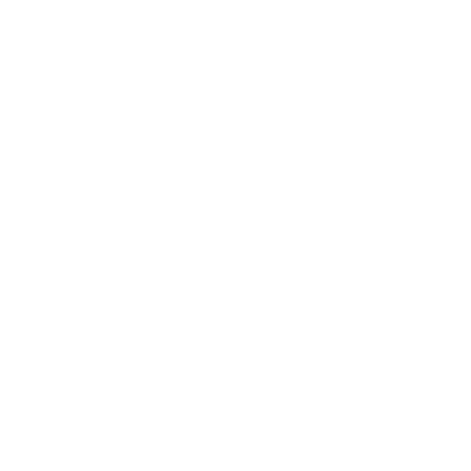

<IPython.core.display.Javascript object>


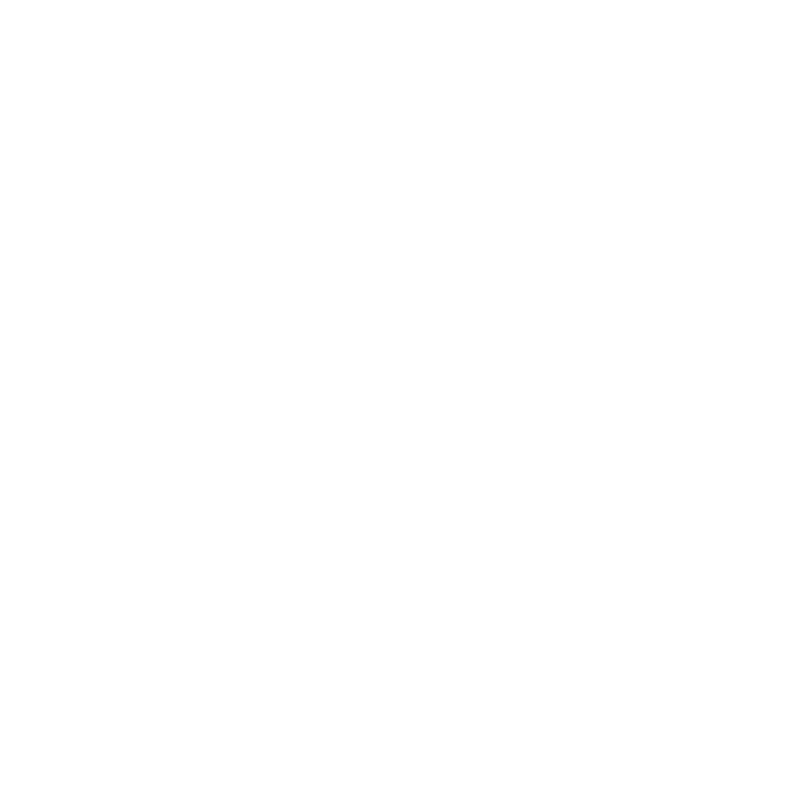

In [22]:
%matplotlib notebook

fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.set_title('vector field')

M = np.hypot(vx,  vy)
Q = ax1.quiver(XXX, YYY, vx,  vy, M,  units='width')



start = time.time()
fig, ax = plt.subplots(2, 2, subplot_kw=dict(), figsize=(10, 10))
ax[0,0].set_title('d')
M = np.hypot(d[:,:,0],  d[:,:,1])
Q = ax[0,0].quiver(XXX, YYY, d[:,:,0],  d[:,:,1], M,  units='width')


ax[0,1].set_title('r')
M = np.hypot(r[:,:,0],  r[:,:,1])
Q = ax[0,1].quiver(XXX, YYY, r[:,:,0],  r[:,:,1], M,  units='width')


ax[1,0].set_title('h')
M = np.hypot(h[:,:,0],  h[:,:,1])
Q = ax[1,0].quiver(XXX, YYY, h[:,:,0],  h[:,:,1], M,  units='width')


v = d+r+h
# ax[1,1].set_title('d+r+h')
# M = np.hypot(v[:,:,0],  v[:,:,1])
# Q = ax[1,1].quiver(X, Y, v[:,:,0],  v[:,:,1], M,  units='width')


# --------------------------------------------
m = v - d
ax[1,1].set_title('h+r')
M = np.hypot(m[:,:,0],  m[:,:,1])
Q = ax[1,1].quiver(XXX, YYY, m[:,:,0],  m[:,:,1], M,  units='width')

# print d.shape

# print decomposition_obj.mesh.divcurl(r)

In [23]:
# calculate the totoal amount of individual field and compare with 
# the response of single force excitation.
# print np.hypot(d[:,:, 0], d[:,:,1])

d_mag_sum = np.sum(np.hypot(d[:,:, 0], d[:,:,1]))
print d_mag_sum

node_compress = pd.read_csv('../FEM_rubber/compress_displacement.txt', sep=" ", 
                            header=None, skipinitialspace=True,
                           names=['magnitude', 'dx', 'dy', 'dz'])
# print node_compress
dx_c = node_compress['dx'].values
dy_c = node_compress['dy'].values
_, _, vx_c, vy_c = interp_grid(x, y, dx_c, dy_c)

v_c_sum = np.sum(np.hypot(vx_c, vy_c))
print v_c_sum

1988.2104785119311


TypeError: interp_grid() takes exactly 8 arguments (4 given)

In [ ]:
D = decomposition_obj.nD
R = decomposition_obj.nRu
print D.shape
rot_ind = np.argmax(R)
print rot_ind
rot_center = (X[rot_ind],Y[rot_ind])
print rot_center

In [ ]:
# calculate the directional value
print d.shape
sum_d = np.sum(d.reshape(Nx*Ny, -1), axis=0)
print sum_d
sum_r = np.sum(r.reshape(Nx*Ny, -1), axis=0)
print sum_r

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
# %matplotlib notebook

# fig = plt.figure(figsize=(8, 8))
# ax = Axes3D(fig)
# ax.scatter3D(X, Y, R)

Nx = 30
Ny = 30

X_ = X.reshape(Nx*Ny)
Y_ = Y.reshape(Nx*Ny)

print X_.shape
rot_max_ind = np.argmax(R)
print rot_max_ind
rot_max_loc = (X_[rot_max_ind], Y_[rot_max_ind])

rot_min_ind = np.argmin(R)
rot_min_loc = (X_[rot_min_ind], Y_[rot_min_ind])

# validate using first derivative
X = X_.reshape(Nx, Ny)
Y = Y_.reshape(Nx, Ny)

i_max = rot_max_ind // Nx
j_max = rot_max_ind % Nx

i_min = rot_min_ind // Nx
j_min = rot_min_ind % Nx

# validate with finite difference symbols
if (R[i_max, j_max] - R[i_max - 1, j_max]) > 0 and (R[i_max + 1, j_max] - R[i_max, j_max]) < 0:
    if (R[i_max, j_max] - R[i_max, j_max - 1]) > 0 and (R[i_max, j_max + 1] - R[i_max, j_max]) < 0:
        # this point is the local minima
        print 'max exist'
        Max = rot_max_loc
    else:

        Max = None
else:
    Max = None
    
print Max

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


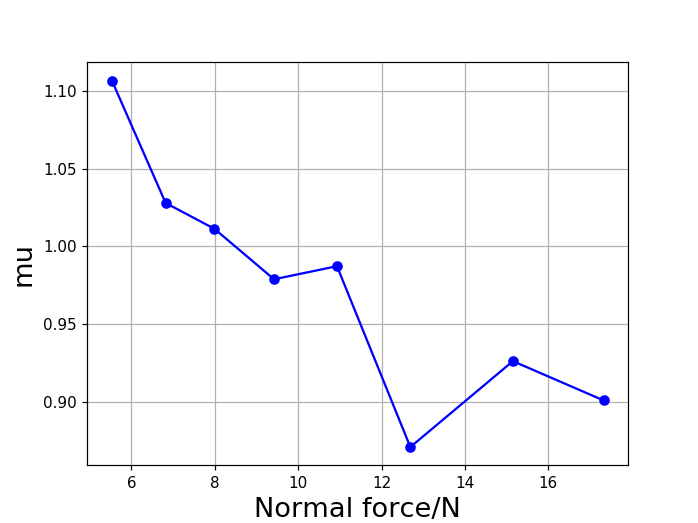

<IPython.core.display.Javascript object>


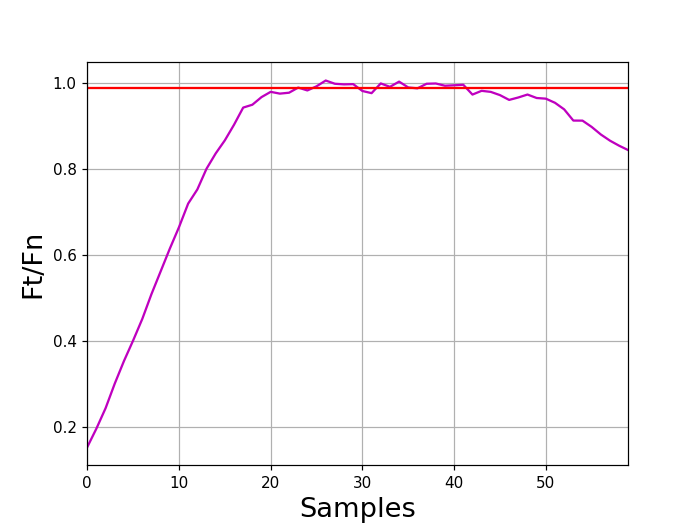

(0, 59)

In [53]:
## plot friction ratio
import pandas as pd

friction_file  = pd.read_csv('../dataset_decomposition/slip_tangential.csv')

F_t = friction_file['F_t'].values
F_n = friction_file['|F_n|'].values

ratio = F_t/F_n


%matplotlib notebook
plt.plot(F_t, 'r', F_n,'g', )#ratio, 'b')

# plt.xlim([852,955])
plt.xlim([0,1300])

# plt.ylim([0,1.5])

plt.grid('on')
plt.xlabel('Samples', fontsize=18)
plt.ylabel('Force/N', fontsize=18)
plt.legend(('Force tangential', 'Force normal'),loc='upper left', prop={'size': 15})

#======================================================
# plot friction ratio change along normal forces

data = np.array([[5.53, 6.12/5.53],
                [6.82, 7.01/6.82],
                [7.99, 8.08/7.99],
                [9.42, 9.22/9.42],
                [10.93, 10.79/10.93],
                [12.69, 11.05/12.69],
                [15.15, 14.03/15.15],
                [17.33, 15.61/17.33]])

fig = plt.figure()

plt.plot(data[:,0], data[:, 1], '-ob')
plt.grid('on')
plt.xlabel('Normal force/N', fontsize=18)
plt.ylabel('mu', fontsize=18)

#========================================================
fig = plt.figure()

plt.plot(ratio[716:776], '-m')
plt.plot(np.ones(60)*0.987, 'r')
plt.grid('on')
plt.xlabel('Samples', fontsize=18)
plt.ylabel('Ft/Fn', fontsize=18)
plt.xlim([0, 59])